# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading dataset

In [2]:
data = pd.read_csv("D:\Maheshfiles\Studies\Smart Bridge\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.set_index('CustomerID', inplace = True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# 3. Performing Visualizations

## (a) Univariate Analysis

### (i) Bar Graph

Text(0.5, 1.0, 'Gender')

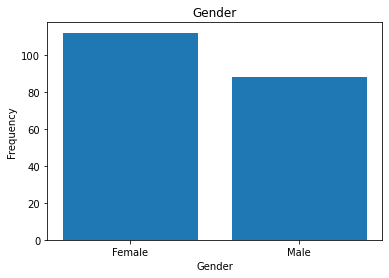

In [5]:
plt.bar(data.Gender.unique()[::-1], data.Gender.value_counts())
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender")

### (ii) Histogarm

(array([ 88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

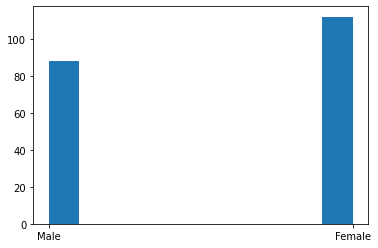

In [6]:
plt.hist(data.Gender)

### (iii) Pie Chart

Text(0.5, 1.0, 'Gender')

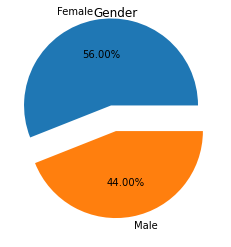

In [7]:
plt.pie(data.Gender.value_counts(), [0.3, 0], labels = ["Female", "Male"], autopct = "%.2f%%")
plt.title("Gender")

## (b) Bivariate Analysis

### (i) Scatter Plot

In [8]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

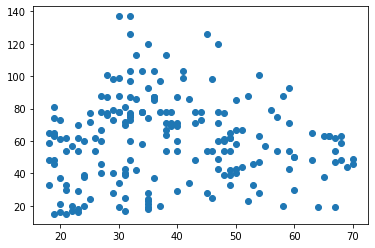

In [9]:
plt.scatter(data.Age, data["Annual Income (k$)"])

## (c) Multivariate Analysis

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

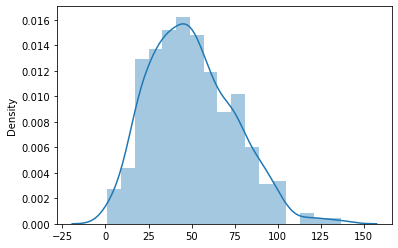

In [10]:
sns.distplot([data["Age"], data["Annual Income (k$)"], data["Spending Score (1-100)"]])

# 4. Descriptive Statistics

In [11]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
data.Age.mean()

38.85

In [14]:
data["Spending Score (1-100)"].median()

50.0

In [15]:
data["Annual Income (k$)"].mode()

0    54
1    78
dtype: int64

In [16]:
np.quantile(data["Annual Income (k$)"],[0.5,0.75])

array([61.5, 78. ])

In [17]:
innerquantilerange = np.quantile(data["Spending Score (1-100)"], [0.75]) - np.quantile(data["Spending Score (1-100)"], [0.25])
innerquantilerange

array([38.25])

In [18]:
rang = data["Spending Score (1-100)"].max() - data["Spending Score (1-100)"].min()
rang

98

# 5. Handling Missing Values

In [19]:
data.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Finding Outliers and Replace

## (a) Finding Outliers

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

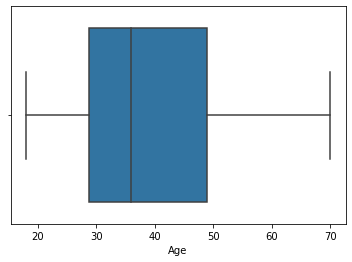

In [20]:
sns.boxplot(data.Age)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

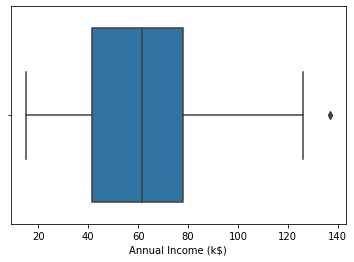

In [21]:
sns.boxplot(data["Annual Income (k$)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2eb559ee220>,
 'caps': [<matplotlib.lines.Line2D at 0x2eb559ee970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2eb559e1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2eb559fb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2eb559fb460>],
 'means': []}

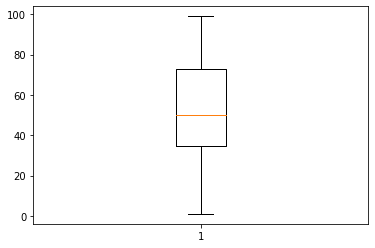

In [22]:
plt.boxplot(data["Spending Score (1-100)"])

## (b) Removing outliers

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

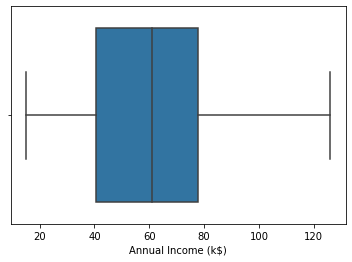

In [23]:
per99 = np.quantile(data["Annual Income (k$)"], 0.99)
data = data[data["Annual Income (k$)"] < per99]
sns.boxplot(data["Annual Income (k$)"])

# 7. Handling Categorical Values

In [23]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [24]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
data.Gender = le.fit_transform(data.Gender)

In [27]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


# 8. Scaling the dataset

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [29]:
data = ss.fit_transform(data)

In [30]:
data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# 9. Performing Clustering Algorithm

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
i = 1
while i < 10:
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(data)
    wcss.append(km.inertia_)
    i += 1
wcss

C:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 386.7147857740689,
 325.44857048543486,
 275.19500469394814,
 236.25761095237866,
 200.31388217165548,
 174.12493921599284]

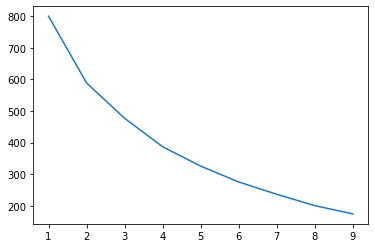

In [33]:
plt.plot(range(1,10), wcss)

In [34]:
km_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
km_model.fit(data)

KMeans(n_clusters=4, random_state=0)

In [35]:
y_pred = km_model.predict(data)

In [36]:
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,1
3,2
4,2


In [37]:
y_pred.value_counts()

2    57
1    55
3    48
0    40
dtype: int64

# 10. Adding Cluster data into Main dataset

In [38]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [39]:
res = [data, y_pred]
data = pd.concat(res, axis = 1)
data.head()

,0,1,2,3,0
0,1.128152,-1.424569,-1.738999,-0.434801,0
1,1.128152,-1.281035,-1.738999,1.195704,0
2,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,2
4,-0.886405,-0.563369,-1.662660,-0.395980,2


# 11. Splitting data into dependent and Independent Variables

In [40]:
X = data.iloc[:,:4]
X.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [41]:
y = data.iloc[:,4]
y

0      0
1      0
2      1
3      2
4      2
      ..
195    2
196    1
197    0
198    3
199    0
Name: 0, Length: 200, dtype: int32

# 12. Train Test Splitting

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


# 13. Building the Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# 14. Training the Model

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# 15. Testing the Model

In [48]:
y_pred = rf.predict(X_test)

In [49]:
y_pred

array([3, 3, 3, 3, 0, 3, 2, 3, 1, 1, 0, 2, 1, 1, 3, 2, 0, 3, 2, 3, 2, 0,
       2, 2, 3, 0, 0, 0, 1, 1, 1, 3, 3, 2, 1, 2, 0, 2, 1, 1])

In [50]:
y_test

18     3
170    3
107    3
98     3
177    0
182    3
5      2
146    3
12     1
152    1
61     0
125    2
180    1
154    1
80     3
7      2
33     0
130    3
37     2
74     3
183    2
145    0
45     2
159    2
60     3
123    0
179    0
185    0
122    2
44     1
16     1
55     3
150    3
111    2
22     1
189    2
129    0
4      2
83     1
106    1
Name: 0, dtype: int32

# 16. Measuring the Performances

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [52]:
accuracy_score(y_pred, y_test)

0.975

In [53]:
confusion_matrix(y_pred, y_test)

array([[ 8,  0,  0,  0],
       [ 0,  9,  1,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [54]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       1.00      0.90      0.95        10\n           2       0.91      1.00      0.95        10\n           3       1.00      1.00      1.00        12\n\n    accuracy                           0.97        40\n   macro avg       0.98      0.97      0.97        40\nweighted avg       0.98      0.97      0.97        40\n'